Projet 5 | Catégorisez automatiquement des questions

Partie 3 | Approche non supervisée

# Présentation du projet
Nous cherchons a aider la communauté de Stack Overflow, site célèbre de questions-réponses liées au développement informatique, en réalisant un API de prédiction de tags.<br/>
L'analyse se basera sur le NLP (Natural language processing) et nous testerons différentes méthodes pour ne sélectionner que la plus efficace et pertinente.

# Import des packages, fonctions et paramétrage initial

Notebook variables reset for each complete execution of this code :

In [ ]:
%reset -f

## Vérification de la version de Python

In [ ]:
!python -V

Python 3.10.12


## Import des packages utiles au projet

### Libraries

In [1]:
# Modules classiques d'analyse exploratoire:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab
%matplotlib inline

# Manipulation fichiers et Interaction avec l'os / notebook
import os
import csv
import requests
import warnings

# Libraries and packages for preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

Using matplotlib backend: <object object at 0x7f5aa5187670>
Populating the interactive namespace from numpy and matplotlib


### MLFlow
https://www.youtube.com/watch?v=6j_qhTJgB1w

In [2]:
!pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.4 MB/s eta 0:00:00


In [3]:
!pip install pyngrok --quiet

In [4]:
# check wether mlflow is installed
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  doctor       Prints out useful information for debugging issues with MLflow.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


In [5]:
import mlflow
from mlflow.tracking import MlflowClient
import mlflow.sklearn

mlflow.set_experiment('IMLP5-Supervisé')

2024/05/30 09:16:30 INFO mlflow.tracking.fluent: Experiment with name 'IMLP5-Supervisé' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/646804731396690459', creation_time=1717060590603, experiment_id='646804731396690459', last_update_time=1717060590603, lifecycle_stage='active', name='IMLP5-Supervisé', tags={}>

In [6]:
#mlflow.set_tracking_uri(uri="http://<host>:<port>")

In [7]:
print(mlflow.__version__)

2.13.0


## Mise en page et réglages divers du notebook

In [8]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

# Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

# Chargement et préparation des données

## Chargement des datasets

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Création des DataFrame
df_cleaned = pd.read_csv("/content/drive/MyDrive/2_Formations/2.0_OpenClassRooms/2.0.0_IML/IML P5/5.1_Data/df_cleaned.csv",
                 sep=';')
df_cleaned.head(1)

,Title,Body,Tags,lemmatized_corpus,lemmatized_tags,stemmed_corpus,stemmed_tags
0,Python kernel dies for second run of PyQt5 GUI,"<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquote>\n <p>(Doing the same even using #sys.exit(app.exec_()) as last line.)</p>\n</blockquote>\n",<python><ipython><anaconda><pyqt5><spyder>,"['python', 'kernel', 'dy', 'second', 'pyqt', 'using', 'spyder', 'python', 'anaconda', 'window', 'package', 'first', 'window', 'open', 'expected', 'nothing', 'open', 'receiving', 'kernel', 'died', 'restarting', 'message', 'import', 'pyqt', 'qtwidgets', 'import', 'qapplication', 'qwidget', 'qapplication', 'argv', 'qwidget', 'resize', 'show', 'exit', 'exec', 'exec', 'iphython', 'runfile', 'work', 'python', 'testproj', 'wdir', 'work', 'python', 'testproj', 'runfile', 'work', 'python', 'testproj', 'wdir', 'work', 'python', 'testproj', 'kernel', 'died', 'restarting', 'kernel', 'died', 'restarting', 'kernel', 'died', 'restarting', 'kernel', 'dy', 'solve', 'even', 'using', 'exit', 'exec', 'last', 'line']","['python', 'ipython', 'anaconda', 'pyqt', 'spyder']","['python', 'kernel', 'die', 'second', 'pyqt', 'use', 'spyder', 'python', 'anaconda', 'window', 'packag', 'first', 'window', 'open', 'expect', 'noth', 'open', 'receiv', 'kernel', 'die', 'restart', 'messag', 'import', 'pyqt', 'qtwidget', 'import', 'qapplic', 'qwidget', 'qapplic', 'argv', 'qwidget', 'resiz', 'show', 'exit', 'exec', 'exec', 'iphython', 'runfil', 'work', 'python', 'testproj', 'wdir', 'work', 'python', 'testproj', 'runfil', 'work', 'python', 'testproj', 'wdir', 'work', 'python', 'testproj', 'kernel', 'die', 'restart', 'kernel', 'die', 'restart', 'kernel', 'die', 'restart', 'kernel', 'die', 'solv', 'even', 'use', 'exit', 'exec', 'last', 'line']","['python', 'ipython', 'anaconda', 'pyqt', 'spyder']"


In [12]:
import ast
df_cleaned['lemmatized_corpus'] = df_cleaned['lemmatized_corpus'].map(
    lambda x: ast.literal_eval(x)
)
df_cleaned['lemmatized_tags'] = df_cleaned['lemmatized_tags'].map(
    lambda x: ast.literal_eval(x)
)
df_cleaned['stemmed_corpus'] = df_cleaned['stemmed_corpus'].map(
    lambda x: ast.literal_eval(x)
)
df_cleaned['stemmed_tags'] = df_cleaned['stemmed_tags'].map(
    lambda x: ast.literal_eval(x)
)

In [13]:
df = df_cleaned.copy()

# Analyse

In [14]:
from nltk import FreqDist

In [15]:
%%time
def build_word_distribution(corpus):
    """
    Build corpus word distribution

    Args:
        Corpus(List of lists): Original corpus

    Returns:

        word_dist_df(DataFrame): Word distribution of the corpus
    """
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10 µs


In [16]:
corpus = df['lemmatized_corpus'].to_list()
word_dist = build_word_distribution(corpus)

tags = df['lemmatized_tags'].to_list()
tag_dist = build_word_distribution(tags)

In [17]:
vocabulary = list(word_dist[word_dist["Frequency"]>=1000].index)
len(vocabulary)

630

In [18]:
corpus = df['lemmatized_corpus'].apply(lambda x: ' '.join(x))

# Preprocessing

## Bag of words
CountVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(vocabulary=vocabulary)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['java', 'error', 'file', 'android', 'class', 'using', 'name',
       'http', 'user', 'data', 'import', 'code', 'test', 'return',
       'public', 'string', 'version', 'module', 'function', 'value',
       'type', 'like', 'python', 'build', 'work', 'true', 'project',
       'server', 'method', 'package', 'request', 'want', 'node', 'json',
       'application', 'self', 'object', 'springframework', 'line', 'core',
       'service', 'model', 'image', 'following', 'spring', 'tried',
       'path', 'would', 'text', 'react', 'trying', 'view', 'dependency',
       'time', 'example', 'need', 'problem', 'create', 'apache', 'main',
       'html', 'gradle', 'found', 'component', 'client', 'system',
       'result', 'internal', 'message', 'content', 'private', 'also',
       'option', 'script', 'null', 'item', 'find', 'false', 'support',
       'library', 'default', 'response', 'google', 'context', 'call',
       'list', 'info', 'install', 'array', 'window', 'layout', 'make',
       'command

In [21]:
bag_of_words_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de Bag of words")
display(bag_of_words_data.sample(10))
print(f" Nombre d'observations: {bag_of_words_data.shape[0]}, nombre de variables: {bag_of_words_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de Bag of words


,java,error,file,android,class,using,name,http,user,data,import,code,test,return,public,string,version,module,function,value,type,like,python,build,work,true,project,server,method,package,request,want,node,json,application,self,object,springframework,line,core,service,model,image,following,spring,tried,path,would,text,react,trying,view,dependency,time,example,need,problem,create,apache,main,html,gradle,found,component,client,system,result,internal,message,content,private,also,option,script,null,item,find,false,support,library,default,response,google,context,call,list,info,install,array,window,layout,make,command,input,local,void,know,index,config,exception,...,latest,center,valid,category,kera,generate,anaconda,someone,logger,word,expect,actually,exit,play,approach,worker,credential,jackson,active,section,cell,disable,loading,protected,meta,material,insert,random,alert,around,log,successfully,row,related,origin,external,made,plot,undefined,place,pool,append,runner,dataset,webdriver,requirement,total,shared,endpoint,sort,float,caused,bind,design,replace,tutorial,rule,card,nested,flask,going,fails,starter,say,come,head,language,asset,dynamic,padding,rail,azure,enabled,bottom,copying,changed,binary,backend,timeout,concurrent,pattern,manager,accept,appdata,dispatch,achieve,normal,conf,exists,println,desktop,exist,complete,startup,person,eslint,installing,apps,might,theme
15544,0,0,1,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,11,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28290,0,6,24,0,0,1,8,0,15,0,0,0,34,6,0,0,0,1,0,2,1,1,58,2,0,2,0,0,0,23,0,0,0,0,0,15,0,0,27,11,1,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,6,1,0,0,3,2,1,0,0,1,0,0,3,0,0,1,3,0,0,0,0,0,0,0,13,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,14,0,0
9907,0,2,0,0,0,1,0,1,0,2,1,1,4,2,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2715,0,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
11404,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,2,3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11516,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3922,0,2,0,0,0,0,1,0,0,2,0,0,0,2,0,0,0,0,5,1,2,0,0,0,1,7,0,1,1,0,2,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

 Nombre d'observations: 29995, nombre de variables: 630


In [22]:
bag_of_words_data.describe()

,java,error,file,android,class,using,name,http,user,data,import,code,test,return,public,string,version,module,function,value,type,like,python,build,work,true,project,server,method,package,request,want,node,json,application,self,object,springframework,line,core,service,model,image,following,spring,tried,path,would,text,react,trying,view,dependency,time,example,need,problem,create,apache,main,html,gradle,found,component,client,system,result,internal,message,content,private,also,option,script,null,item,find,false,support,library,default,response,google,context,call,list,info,install,array,window,layout,make,command,input,local,void,know,index,config,exception,...,latest,center,valid,category,kera,generate,anaconda,someone,logger,word,expect,actually,exit,play,approach,worker,credential,jackson,active,section,cell,disable,loading,protected,meta,material,insert,random,alert,around,log,successfully,row,related,origin,external,made,plot,undefined,place,pool,append,runner,dataset,webdriver,requirement,total,shared,endpoint,sort,float,caused,bind,design,replace,tutorial,rule,card,nested,flask,going,fails,starter,say,come,head,language,asset,dynamic,padding,rail,azure,enabled,bottom,copying,changed,binary,backend,timeout,concurrent,pattern,manager,accept,appdata,dispatch,achieve,normal,conf,exists,println,desktop,exist,complete,startup,person,eslint,installing,apps,might,theme
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000
m

## TF-IDF

### Vectorisation

In [23]:
%%time
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

CPU times: user 3 s, sys: 21.6 ms, total: 3.02 s
Wall time: 3.05 s


In [24]:
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF")
display(tfidf_data.sample(10))
print(f" Nombre d'observations: {tfidf_data.shape[0]}, nombre de variables: {tfidf_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF


,java,error,file,android,class,using,name,http,user,data,import,code,test,return,public,string,version,module,function,value,type,like,python,build,work,true,project,server,method,package,request,want,node,json,application,self,object,springframework,line,core,service,model,image,following,spring,tried,path,would,text,react,trying,view,dependency,time,example,need,problem,create,apache,main,html,gradle,found,component,client,system,result,internal,message,content,private,also,option,script,null,item,find,false,support,library,default,response,google,context,call,list,info,install,array,window,layout,make,command,input,local,void,know,index,config,exception,...,latest,center,valid,category,kera,generate,anaconda,someone,logger,word,expect,actually,exit,play,approach,worker,credential,jackson,active,section,cell,disable,loading,protected,meta,material,insert,random,alert,around,log,successfully,row,related,origin,external,made,plot,undefined,place,pool,append,runner,dataset,webdriver,requirement,total,shared,endpoint,sort,float,caused,bind,design,replace,tutorial,rule,card,nested,flask,going,fails,starter,say,come,head,language,asset,dynamic,padding,rail,azure,enabled,bottom,copying,changed,binary,backend,timeout,concurrent,pattern,manager,accept,appdata,dispatch,achieve,normal,conf,exists,println,desktop,exist,complete,startup,person,eslint,installing,apps,might,theme
9839,0.031619,0.019942,0.000000,0.165276,0.023657,0.000000,0.049096,0.0,0.000000,0.024858,0.000000,0.020221,0.0,0.000000,0.000000,0.026963,0.054960,0.00000,0.0,0.053511,0.026364,0.0,0.0,0.089014,0.000000,0.082193,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.032555,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.034362,0.000000,0.0,0.0,0.000000,0.000000,0.028436,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.032144,0.0,0.03477,0.000000,0.000000,0.0,0.136898,0.0,0.000000,0.000000,0.000000,0.000000,0.123779,0.0,0.036251,0.036461,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.034172,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049395,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18280,0.040208,0.000000,0.285571,0.462370,0.060166,0.000000,0.000000,0.0,0.000000,0.000000,0.107232,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.07985,0.0,0.000000,0.000000,0.0,0.0,0.264114,0.000000,0.000000,0.179793,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.069664,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.031528,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.138921,0.0,0.0,0.000000,0.033663,0.036160,0.0,0.000000,0.0,0.570324,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.034164,0.042043,0.0,0.000000,0.0,0.000000,0.040549,0.045842,0.000000,0.078700,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057451,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056776,0.060232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.146610,0.0,0.

 Nombre d'observations: 29995, nombre de variables: 630


In [25]:
tfidf_data.describe()

,java,error,file,android,class,using,name,http,user,data,import,code,test,return,public,string,version,module,function,value,type,like,python,build,work,true,project,server,method,package,request,want,node,json,application,self,object,springframework,line,core,service,model,image,following,spring,tried,path,would,text,react,trying,view,dependency,time,example,need,problem,create,apache,main,html,gradle,found,component,client,system,result,internal,message,content,private,also,option,script,null,item,find,false,support,library,default,response,google,context,call,list,info,install,array,window,layout,make,command,input,local,void,know,index,config,exception,...,latest,center,valid,category,kera,generate,anaconda,someone,logger,word,expect,actually,exit,play,approach,worker,credential,jackson,active,section,cell,disable,loading,protected,meta,material,insert,random,alert,around,log,successfully,row,related,origin,external,made,plot,undefined,place,pool,append,runner,dataset,webdriver,requirement,total,shared,endpoint,sort,float,caused,bind,design,replace,tutorial,rule,card,nested,flask,going,fails,starter,say,come,head,language,asset,dynamic,padding,rail,azure,enabled,bottom,copying,changed,binary,backend,timeout,concurrent,pattern,manager,accept,appdata,dispatch,achieve,normal,conf,exists,println,desktop,exist,complete,startup,person,eslint,installing,apps,might,theme
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000


In [26]:
df.shape

(29995, 7)

In [27]:
tfidf_data.shape


(29995, 630)

In [28]:
df_tfidf = pd.concat([df, tfidf_data], axis = 1)

In [29]:
df_tfidf.shape

(29995, 637)

In [30]:
df_tfidf = df_tfidf.dropna(subset=['Title'])

In [31]:
df_tfidf.shape

(29995, 637)

In [32]:
df_tfidf.head()

Title  \
0                          Python kernel dies for second run of PyQt5 GUI   
1              How can I use optional chaining with arrays and functions?   
2  When to apply(pd.to_numeric) and when to astype(np.float64) in python?   
3                                         Get Webpack not to bundle files   
4                                                SwiftUI tappable subtext   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_tfidf = tsne.fit_transform(tfidf_data)
tsne_tfidf

In [ ]:
df_tsne_tfidf = pd.DataFrame(tsne_tfidf, columns=['Dim0', 'Dim1'])
df_tsne_tfidf.to_csv('/content/drive/MyDrive/2_Formations/2.0_OpenClassRooms/2.0.0_IML/IML P5/5.1_Data/df_tsne_tfidf.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement

In [33]:
# Création des DataFrame
df_tsne_tfidf = pd.read_csv("/content/drive/MyDrive/2_Formations/2.0_OpenClassRooms/2.0.0_IML/IML P5/5.1_Data/df_tsne_tfidf.csv",
                            sep=';')
df_tsne_tfidf.head(1)

,Dim0,Dim1
0,14.358337,36.811188


<Axes: xlabel='Dim0', ylabel='Dim1'>

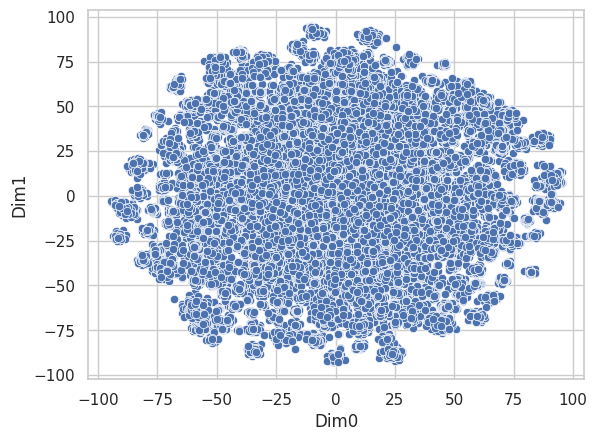

In [34]:
sns.scatterplot(data=df_tsne_tfidf,
                x="Dim0",
                y="Dim1",
                )

In [35]:
df_tot_tfidf = pd.concat([df_tfidf, df_tsne_tfidf], axis = 1)

# Approche non supervisée

In [37]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

## NMF

In [38]:
from sklearn.decomposition import NMF
no_topics = 40
# Run NMF
nmf = NMF(n_components=no_topics,
          random_state=1,
          #alpha=.1,
          l1_ratio=.5,
          #init='nndsvd'
          )
nmf.fit(X)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
function return console promise async event const await call result
Topic 1:
android layout support studio parent activity google match intent device
Topic 2:
error message failed getting code following tried found trying type
Topic 3:
java apache lang springframework internal util invoke reflect catalina exception
Topic 4:
column dataframe panda index spark row plot frame want list
Topic 5:
module webpack loader require path babel config index export dist
Topic 6:
html page script chrome element http browser selenium google javascript
Topic 7:
public void private return service override method entity controller context
Topic 8:
python install package line site local installed anaconda version command
Topic 9:
file line path upload directory folder read download open filename
Topic 10:
image size width height background base path asset upload convert
Topic 11:
test unit mock jest testing junit train expect setup case
Topic 12:
user password email token username login auth auth

## LDA model sur le corpus (titre + body)
LDA :
- https://towardsdatascience.com/topic-modeling-with-gensim-a5609cefccc
- https://github.com/kapadias/medium-articles/blob/master/natural-language-processing/topic-modeling/Evaluate%20Topic%20Models.ipynb

### Process

In [40]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary

In [41]:
id2word = gensim.corpora.Dictionary(df['lemmatized_corpus'])
id2word.filter_extremes(no_below=15, no_above=0.4, keep_n=80000)

BoW_corpus = [id2word.doc2bow(text) for text in df['lemmatized_corpus']]
tfidf = gensim.models.TfidfModel(BoW_corpus, smartirs='ntc')
transformed_tfidf = tfidf[BoW_corpus]

In [42]:
%%time
models=[]
coherence_value = []
best_nb = 0
best_coherence = 0
limit=13
start=6
step=1
for topic_number in range(start,limit,step):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=transformed_tfidf,
                                           id2word=id2word,
                                            num_topics=topic_number,
                                              random_state = 42)
  models.append(lda_model)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=df['lemmatized_corpus'].to_list(),
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_value.append(coherence_lda)
  print(f"Pour {topic_number} topics, la cohérence est de {round(coherence_lda,3)}")

  if best_coherence < coherence_lda:
    best_nb = topic_number
    best_coherence = coherence_lda


Pour 6 topics, la cohérence est de 0.47
Pour 7 topics, la cohérence est de 0.511
Pour 8 topics, la cohérence est de 0.57
Pour 9 topics, la cohérence est de 0.581
Pour 10 topics, la cohérence est de 0.53
Pour 11 topics, la cohérence est de 0.555
Pour 12 topics, la cohérence est de 0.531
CPU times: user 6min 55s, sys: 2.21 s, total: 6min 57s
Wall time: 7min 4s


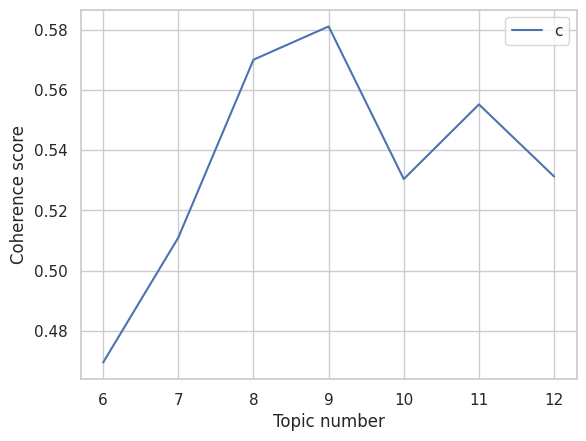

Topic number = 6  has Coherence Value of 0.4695
Topic number = 7  has Coherence Value of 0.511
Topic number = 8  has Coherence Value of 0.57
Topic number = 9  has Coherence Value of 0.581
Topic number = 10  has Coherence Value of 0.5304
Topic number = 11  has Coherence Value of 0.5552
Topic number = 12  has Coherence Value of 0.5312


In [43]:
x = range(start, limit, step)
plt.plot(x, coherence_value)
plt.xlabel("Topic number")
plt.ylabel("Coherence score")
plt.legend(("coherence_value"), loc='best')
plt.show()

for m, cv in zip(x, coherence_value):
    print("Topic number =", m, " has Coherence Value of", round(cv, 4))

In [44]:
%%time
from pprint import pprint
optimal_model = models[3]

print('\nPerplexity: ', optimal_model.log_perplexity(transformed_tfidf))

coherence_model_lda = CoherenceModel(model=optimal_model, texts=df['lemmatized_corpus'].to_list(), dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))


Perplexity:  -9.062048111439255

Coherence Score:  0.581036041572223
[(0,
  '0.019*"java" + 0.015*"spring" + 0.012*"public" + 0.010*"boot" + '
  '0.009*"springframework" + 0.009*"class" + 0.006*"dependency" + 0.006*"bean" '
  '+ 0.006*"test" + 0.005*"maven" + 0.005*"private" + 0.005*"hibernate" + '
  '0.005*"apache" + 0.005*"string" + 0.005*"void" + 0.005*"entity" + '
  '0.005*"annotation" + 0.005*"exception" + 0.004*"method" + 0.004*"property" '
  '+ 0.004*"version" + 0.004*"configuration" + 0.004*"junit" + '
  '0.004*"artifactid" + 0.004*"context" + 0.004*"groupid" + 0.004*"repository" '
  '+ 0.003*"service" + 0.003*"release" + 0.003*"static"'),
 (1,
  '0.007*"react" + 0.006*"value" + 0.006*"column" + 0.006*"data" + '
  '0.005*"table" + 0.005*"name" + 0.005*"component" + 0.005*"string" + '
  '0.005*"function" + 0.005*"array" + 0.005*"type" + 0.004*"user" + '
  '0.004*"dataframe" + 0.004*"object" + 0.004*"date" + 0.004*"class" + '
  '0.004*"import" + 0.004*"model" + 0.004*"const" + 0

In [45]:
topic_number = best_nb
lda_model = gensim.models.ldamodel.LdaModel(corpus=transformed_tfidf,
                                           id2word=id2word,
                                            num_topics=topic_number)
lda_model.show_topics(topic_number)

[(0,
  '0.013*"python" + 0.011*"install" + 0.010*"docker" + 0.009*"file" + 0.008*"package" + 0.007*"command" + 0.007*"build" + 0.007*"window" + 0.007*"studio" + 0.006*"version"'),
 (1,
  '0.011*"public" + 0.009*"android" + 0.008*"string" + 0.008*"model" + 0.007*"microsoft" + 0.007*"intent" + 0.006*"service" + 0.006*"gradle" + 0.006*"class" + 0.006*"json"'),
 (2,
  '0.009*"text" + 0.008*"button" + 0.008*"form" + 0.008*"color" + 0.008*"input" + 0.007*"class" + 0.007*"html" + 0.007*"label" + 0.006*"plot" + 0.006*"bootstrap"'),
 (3,
  '0.014*"model" + 0.012*"layer" + 0.012*"train" + 0.011*"self" + 0.011*"kera" + 0.007*"image" + 0.007*"shape" + 0.007*"loss" + 0.007*"tensorflow" + 0.007*"size"'),
 (4,
  '0.006*"request" + 0.006*"user" + 0.005*"token" + 0.005*"http" + 0.005*"server" + 0.004*"client" + 0.004*"response" + 0.004*"error" + 0.004*"header" + 0.004*"xcode"'),
 (5,
  '0.006*"column" + 0.006*"data" + 0.006*"array" + 0.005*"file" + 0.005*"dataframe" + 0.005*"json" + 0.005*"module" + 0.

In [46]:
doc_lda = lda_model[transformed_tfidf]
doc_lda

In [47]:
get_document_topics = lda_model.get_document_topics(transformed_tfidf)
print(get_document_topics[0])

[(0, 0.7196135), (1, 0.123389766), (2, 0.022356872), (3, 0.022793971), (4, 0.02234072), (5, 0.022341458), (6, 0.022415001), (7, 0.022410782), (8, 0.022337975)]


In [48]:
topics = lda_model.print_topics(num_topics=10, num_words=10)
topics

[(0,
  '0.013*"python" + 0.011*"install" + 0.010*"docker" + 0.009*"file" + 0.008*"package" + 0.007*"command" + 0.007*"build" + 0.007*"window" + 0.007*"studio" + 0.006*"version"'),
 (1,
  '0.011*"public" + 0.009*"android" + 0.008*"string" + 0.008*"model" + 0.007*"microsoft" + 0.007*"intent" + 0.006*"service" + 0.006*"gradle" + 0.006*"class" + 0.006*"json"'),
 (2,
  '0.009*"text" + 0.008*"button" + 0.008*"form" + 0.008*"color" + 0.008*"input" + 0.007*"class" + 0.007*"html" + 0.007*"label" + 0.006*"plot" + 0.006*"bootstrap"'),
 (3,
  '0.014*"model" + 0.012*"layer" + 0.012*"train" + 0.011*"self" + 0.011*"kera" + 0.007*"image" + 0.007*"shape" + 0.007*"loss" + 0.007*"tensorflow" + 0.007*"size"'),
 (4,
  '0.006*"request" + 0.006*"user" + 0.005*"token" + 0.005*"http" + 0.005*"server" + 0.004*"client" + 0.004*"response" + 0.004*"error" + 0.004*"header" + 0.004*"xcode"'),
 (5,
  '0.006*"column" + 0.006*"data" + 0.006*"array" + 0.005*"file" + 0.005*"dataframe" + 0.005*"json" + 0.005*"module" + 0.

In [49]:
%%time
doc =lda_model.get_document_topics(transformed_tfidf)
data = pd.DataFrame()

def get_max(doc):
        idx,l = zip(*doc)
        return idx[np.argmax(l)]

data['doc_topic'] = [get_max(doc) for doc in lda_model.get_document_topics(transformed_tfidf)]

CPU times: user 18.9 s, sys: 136 ms, total: 19 s
Wall time: 26.3 s


In [50]:
data['doc_topic'].value_counts()

doc_topic
5    7488
4    6788
0    4440
6    3540
8    2745
2    2175
1    1070
7     938
3     811
Name: count, dtype: int64

In [51]:
print(topics)

[(0, '0.013*"python" + 0.011*"install" + 0.010*"docker" + 0.009*"file" + 0.008*"package" + 0.007*"command" + 0.007*"build" + 0.007*"window" + 0.007*"studio" + 0.006*"version"'), (1, '0.011*"public" + 0.009*"android" + 0.008*"string" + 0.008*"model" + 0.007*"microsoft" + 0.007*"intent" + 0.006*"service" + 0.006*"gradle" + 0.006*"class" + 0.006*"json"'), (2, '0.009*"text" + 0.008*"button" + 0.008*"form" + 0.008*"color" + 0.008*"input" + 0.007*"class" + 0.007*"html" + 0.007*"label" + 0.006*"plot" + 0.006*"bootstrap"'), (3, '0.014*"model" + 0.012*"layer" + 0.012*"train" + 0.011*"self" + 0.011*"kera" + 0.007*"image" + 0.007*"shape" + 0.007*"loss" + 0.007*"tensorflow" + 0.007*"size"'), (4, '0.006*"request" + 0.006*"user" + 0.005*"token" + 0.005*"http" + 0.005*"server" + 0.004*"client" + 0.004*"response" + 0.004*"error" + 0.004*"header" + 0.004*"xcode"'), (5, '0.006*"column" + 0.006*"data" + 0.006*"array" + 0.005*"file" + 0.005*"dataframe" + 0.005*"json" + 0.005*"module" + 0.004*"value" + 0.0

In [52]:
topics_df = pd.DataFrame(lda_model.show_topic(2))
topics_df

,0,1
0,text,0.008899
1,button,0.008365
2,form,0.008240
3,color,0.008067
4,input,0.007930
5,class,0.007399
6,html,0.007221
7,label,0.006858
8,plot,0.006387
9,bootstrap,0.006306


### Visualisation 2D

In [53]:
tsne = df_tsne_tfidf
topics = data['doc_topic']

In [54]:
df_viz = pd.concat([tsne, topics], axis=1)

In [55]:
df_viz_2 = df_viz[df_viz["Dim1"].gt(-1000)]

<Axes: xlabel='Dim0', ylabel='Dim1'>

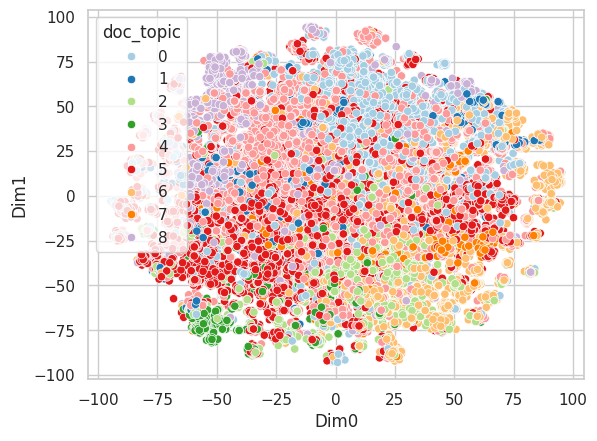

In [56]:
sns.scatterplot(data=df_viz_2,
                x="Dim0",
                y="Dim1",
                hue='doc_topic',
                palette="Paired")